In [14]:
from IPython.display import clear_output
get_ipython().system('pip install imutils')
clear_output()
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools



init_notebook_mode(connected=True)
RANDOM_SEED = 333
clear_output()

In [15]:
#Code partly Extracted from https://www.kaggle.com/nikitanikonov/brain-tumor-detection

#Training Dataset

data_dir = 'C:user/path/.../Training'

print('Training dataset is read from path:',data_dir)

Training_dir=os.listdir(data_dir);
Total_Training=0;
class_num=[]
CLASS_list=[]
for CLASS in Training_dir:
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(data_dir + '/' + CLASS))
        Total_Training=Total_Training+IMG_NUM
        class_num.append(IMG_NUM)
        CLASS_list.append(CLASS)
        print('There are ',IMG_NUM,' training images from class: ',CLASS)
        
print('There are ',Total_Training, 'images for training');
print(CLASS_list)
print(class_num)
fig = plt.figure(figsize = (10, 5))
 


Training dataset is read from path: C:/Users/sebas/$ML_PATH/PROJECT/braintumor/Training
There are  1321  training images from class:  glioma
There are  1339  training images from class:  meningioma
There are  1595  training images from class:  notumor
There are  1457  training images from class:  pituitary
There are  5712 images for training
['glioma', 'meningioma', 'notumor', 'pituitary']
[1321, 1339, 1595, 1457]


<Figure size 720x360 with 0 Axes>

In [16]:
#Testing Dataset
CLASS_list = ['glioma','meningioma', 'notumor','pituitary']
test_dir = 'C:user/path/.../Testing'



In [17]:
print('Testing dataset is read from path:',test_dir)

Testing_dir=os.listdir(test_dir);
Total_Testing=0;
class_num_testing=[]
CLASS_list_testing=[]
for CLASS in Testing_dir:
    if not CLASS.startswith('.'):
        IMG_NUM = len(os.listdir(test_dir + '/' + CLASS))
        Total_Testing=Total_Testing+IMG_NUM
        class_num_testing.append(IMG_NUM)
        CLASS_list_testing.append(CLASS)
        print('There are ',IMG_NUM,' testing images from class: ',CLASS)
        
print('There are ',Total_Testing, 'images for testing');
print(CLASS_list_testing)
print(class_num_testing)
fig = plt.figure(figsize = (10, 5))

Testing dataset is read from path: C:/Users/sebas/$ML_PATH/PROJECT/braintumor/Testing
There are  300  testing images from class:  glioma
There are  306  testing images from class:  meningioma
There are  405  testing images from class:  notumor
There are  300  testing images from class:  pituitary
There are  1311 images for testing
['glioma', 'meningioma', 'notumor', 'pituitary']
[300, 306, 405, 300]


<Figure size 720x360 with 0 Axes>

# Data Visualization

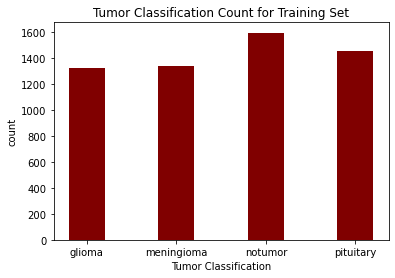

In [18]:
# creating the bar plot
plt.bar(CLASS_list, class_num, color ='maroon',
        width = 0.4)
plt.xlabel("Tumor Classification")
plt.ylabel("count")
plt.title("Tumor Classification Count for Training Set")
plt.show()

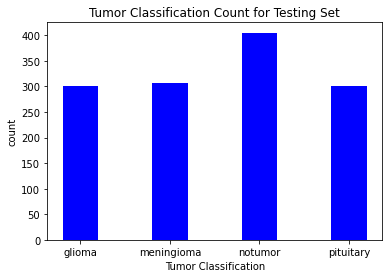

In [19]:
# creating the bar plot for Testing Set
plt.bar(CLASS_list_testing, class_num_testing, color ='blue',
        width = 0.4)
plt.xlabel("Tumor Classification")
plt.ylabel("count")
plt.title("Tumor Classification Count for Testing Set")
plt.show()

(512, 512, 3)

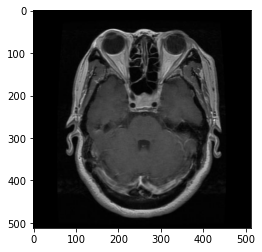

In [20]:
data_dir = 'C:/Users/sebas/$ML_PATH/PROJECT/braintumor/Training'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
plt.imshow(img_array);
# The image shape.
img_array.shape

In [21]:

data_dir = 'C:user/path/.../Training'
test_dir = 'C:user/path/.../Testing'
classes = os.listdir(data_dir)
print(classes)
print(len(classes))


['glioma', 'meningioma', 'notumor', 'pituitary']
4


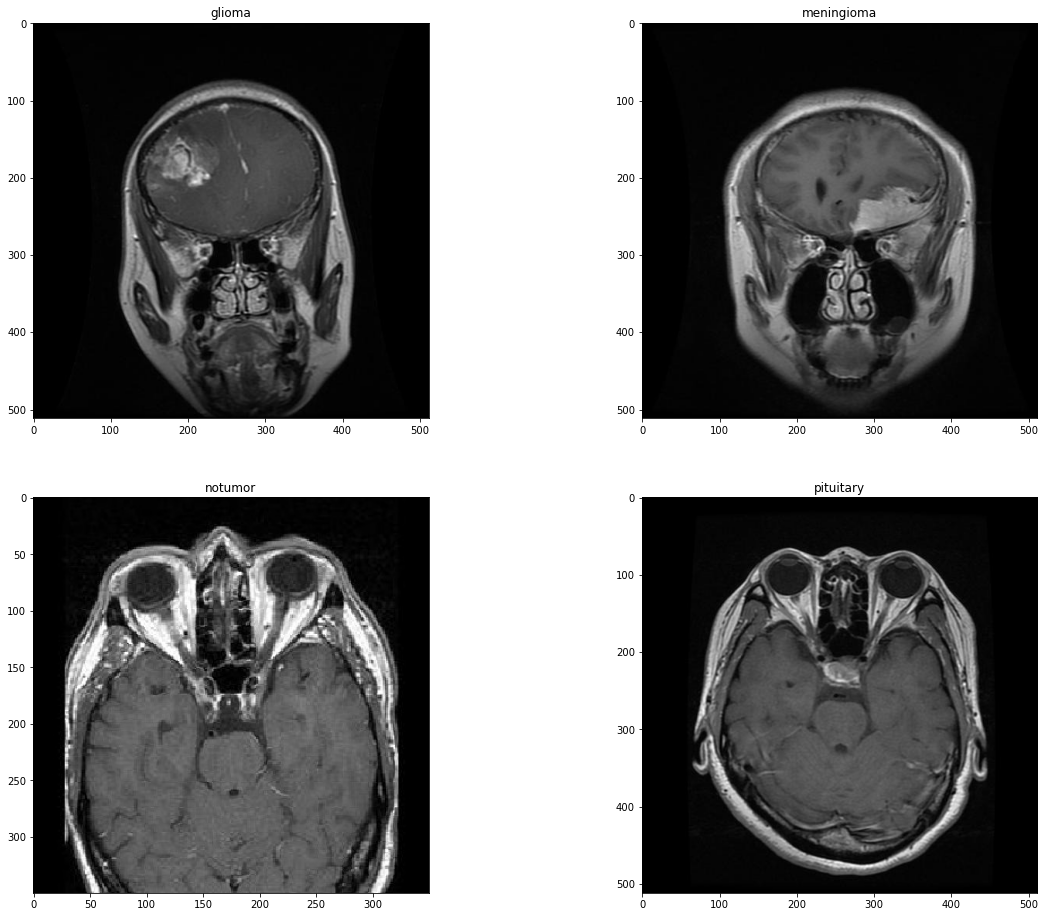

In [22]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    #img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

## MODEL 1

In [23]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))  # data is input as 64x64 grayscale,32 is number of the filters, 3x3 is the kernel size
model1.add(BatchNormalization()) #optimize data
model1.add(MaxPooling2D(pool_size=(2,2))) #down sampling by 2x2 square filtering to chose the biggest number


# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten()) #vectorization-converting data to 1D array

# Neural network

model1.add(Dense(units= 252, activation='relu')) #denses are fully connected layers. unit is the output of the dimension. 252 is comming frome the last layer that should be connected to all layers
model1.add(Dropout(0.2)) #20% dropout
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2)) #20% dropout
model1.add(Dense(units=4, activation='softmax')) # because we have 4 classes. number of the last layer should be the same as the classes' numbers


#using Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)

#the loss funtion is set to categorical crossentropy because we have multiclass (four classes) classification
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)
#image augmention
# increase train and test dataset

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0.8,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

# Creating the train and test data.

train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
classes = list(train.class_indices.keys())
print('Classes: '+str(classes))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


Found 5712 images belonging to 4 classes.


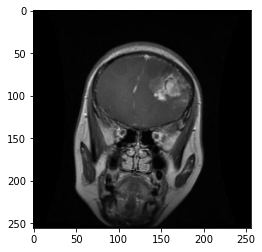

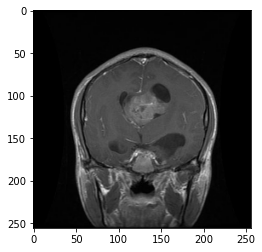

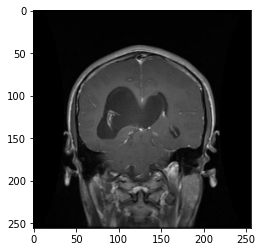

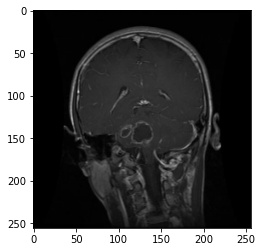

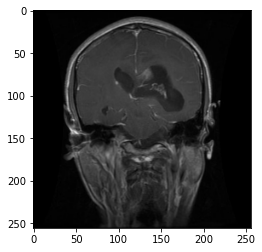

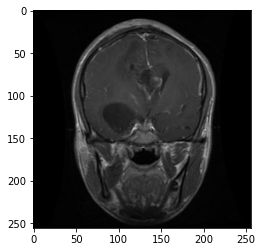

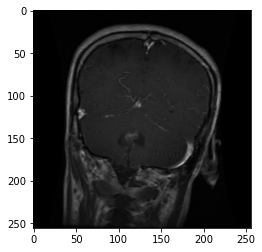

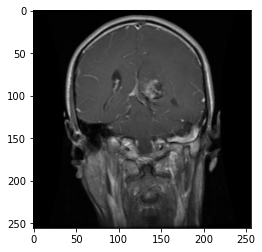

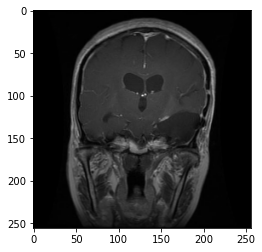

In [24]:
#SAVE THE AUGMENTED CODE TO A PATH TO VERIFY AUGMENTATION OCCURS
#Source code for cell: https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
dir_It = generator_train.flow_from_directory(
    "C:user/path/...Training",
    batch_size=1,
    save_to_dir="C:user/path/...Augment",
    save_prefix="",
    save_format='jpeg',
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)


for _ in range(9):
    
    batch = dir_It.next()[0]*256
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.show()

In [25]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model1_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1_mcp = ModelCheckpoint(filepath = 'model1_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, shuffle = True, validation_steps= 1311//32,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

178/178 [==============================] - 21s 117ms/step - loss: 0.8052 - categorical_accuracy: 0.7224 - val_loss: 2.7975 - val_categorical_accuracy: 0.4391

Epoch 00001: val_categorical_accuracy improved from -inf to 0.43906, saving model to model1_weights.h5


In [26]:
model1.evaluate(test) #PROVIDES A PERFORMANCE METRICS FOR LOSS AND ACCURACY OF MODEL BASED OFF TEST DATA

41/41 [==============================] - 2s 55ms/step - loss: 2.7847 - categorical_accuracy: 0.4447


[2.7847044467926025, 0.444698691368103]

In [27]:
model1.summary() #PROVIDES A SUMMARY OF CNN PARAMETERS

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

## MODEL 1 BETA

In [30]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns


model1beta = Sequential()

# Convolutional layer 1
model1beta.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu')) # data is input as 64x64 grayscale, 32 is number of the filters, 3x3 is the kernel size
model1beta.add(BatchNormalization()) #optimize data
model1beta.add(MaxPooling2D(pool_size=(2,2))) #down sampling by 2x2 square filtering to chose the biggest number

# Convolutional layer 2
model1beta.add(Conv2D(64,(3,3), activation='relu'))
model1beta.add(BatchNormalization())
model1beta.add(MaxPooling2D(pool_size=(2,2)))
model1beta.add(Dropout(0.2)) #20% dropout

model1beta.add(Flatten()) #vectorization-converting data to 1D array

# Neural network

model1beta.add(Dense(units= 128, activation='relu')) #denses are fully connected layers. unit is the output of the dimension. 128 is comming frome the last layer that should be connected to all layers
model1beta.add(Dropout(0.3)) #30% dropout
model1beta.add(Dense(units=252, activation='relu'))

model1beta.add(Dense(units=4, activation='softmax')) # because we have 4 classes. number of the last layer should be the same as the classes' numbers


#using Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)

#the loss funtion is set to categorical crossentropy because we have multiclass (four classes) classification
model1beta.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])



# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)
#image augmention
# increase train and test dataset

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=True,
                                    rotation_range=0.8,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

# Creating the train and test data.

train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
classes = list(train.class_indices.keys())
print('Classes: '+str(classes))

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning:

This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [31]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model1beta_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1beta_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1beta_mcp = ModelCheckpoint(filepath = 'model1b_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1beta = model1beta.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, shuffle = True, validation_steps= 1311//32,
                     callbacks=[model1beta_es, model1beta_rlr, model1beta_mcp])

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning:

This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning:

This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.



178/178 [==============================] - 22s 121ms/step - loss: 0.8275 - categorical_accuracy: 0.7102 - val_loss: 4.1057 - val_categorical_accuracy: 0.2516

Epoch 00001: val_categorical_accuracy improved from -inf to 0.25156, saving model to model1b_weights.h5


In [32]:
model1beta.evaluate(test) #PROVIDES PERFORMANCE METRICS FOR LOSS AND ACCURACY OF MODEL BASED OFF TEST DATA

41/41 [==============================] - 2s 55ms/step - loss: 4.1057 - categorical_accuracy: 0.2494


[4.105681419372559, 0.2494279146194458]

In [33]:
model1beta.summary() #PROVIDES A SUMMARY OF CNN MODEL PARAMTERS

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)       

## Model 2

In [36]:
#Convultional layers with RELU activation function. Number of feature filters doubles per layer
model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #Data is input as 64x64 grayscale, 64 feature filters 7x7 Kernal 64x64 input of grayscale type
model2.add(BatchNormalization()) #optimize data
model2.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #128 feature filters 7x7 Kernal 64x64 input of grayscale type
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2

# Convolutional layer 3
model2.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #256 feature filters 7x7 Kernal 64x64 input of grayscale type
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2

# Convolutional layer 4
model2.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #512 feature filters 7x7 Kernal 64x64 input of grayscale type
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2


model2.add(Flatten())#vectorization-converting data to 1D array

# Full connect layers

model2.add(Dense(units= 512, activation='relu')) 
model2.add(Dropout(0.2)) #20% dropout
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2)) #20% dropout
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [37]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
classes = list(train.class_indices.keys())
print('Classes: '+str(classes))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


Training model 2

In [38]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.


#accurecy result is worse than model1 because deeper model cause the overfitting
#small dataset doen't need deep neural network ** so many convolutional layers
# number of the filter is 64 in this model

# Stop training if loss doesn't keep decreasing.
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr, model2_mcp])

178/178 [==============================] - 159s 889ms/step - loss: 1.3812 - categorical_accuracy: 0.6085 - val_loss: 3.4265 - val_categorical_accuracy: 0.2297

Epoch 00001: val_categorical_accuracy improved from -inf to 0.22969, saving model to model2_weights.h5


In [39]:
model2.evaluate(test) #PROVIDES A PERFORMANCE METRICS FOR LOSS AND ACCURACY OF MODEL 2 ON THE TEST DATA

41/41 [==============================] - 6s 155ms/step - loss: 3.4294 - categorical_accuracy: 0.2288


[3.4293954372406006, 0.22883294522762299]

In [40]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)      

## Model 2 Beta

In [43]:
#Convultional layers with RELU activation function. Number of feature filters doubles per layer
model2beta = Sequential()

# Convolutional layer 1
model2beta.add(Conv2D(32,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #Data is input as 64x64 grayscale, 32 feature filters 7x7 Kernal 64x64 input of grayscale type
model2beta.add(BatchNormalization()) #optimize data
model2beta.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2
# Convolutional layer 2
model2beta.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #Data is input as 64x64 grayscale, 64 feature filters 7x7 Kernal 64x64 input of grayscale type
model2beta.add(BatchNormalization()) #optimize data
model2beta.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2
model2beta.add(Dropout(0.2))#20% dropout
#Convolutional layer 3
model2beta.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #128 feature filters 7x7 Kernal 64x64 input of grayscale type
model2beta.add(BatchNormalization())
model2beta.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2
model2beta.add(Dropout(0.2))
# Convolutional layer 4
model2beta.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #256 feature filters 7x7 Kernal 64x64 input of grayscale type
model2beta.add(BatchNormalization())
model2beta.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2
model2beta.add(Dropout(0.2))
# Convolutional layer 5
model2beta.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #512 feature filters 7x7 Kernal 64x64 input of grayscale type
model2beta.add(BatchNormalization())
model2beta.add(MaxPooling2D(pool_size=(2,2))) #Max pooling 2x2


model2beta.add(Flatten()) #vectorization-converting data to 1D array

# Full connect layers

model2beta.add(Dense(units= 512, activation='relu'))
model2beta.add(Dropout(0.2))
model2beta.add(Dense(units=512, activation='relu'))
model2beta.add(Dropout(0.2))
model2beta.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2beta.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [44]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')
classes = list(train.class_indices.keys())
print('Classes: '+str(classes))

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [45]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.


#accuracy result is worse than model1 because deeper model cause the overfitting
#small dataset doen't need deep neural network ** so many convolutional layers
# number of the filter is 64 in this model

# Stop training if loss doesn't keep decreasing.
model2beta_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2beta_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2beta_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2beta = model2beta.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2beta_es, model2beta_rlr, model2beta_mcp])

178/178 [==============================] - 105s 586ms/step - loss: 1.0147 - categorical_accuracy: 0.6467 - val_loss: 1.5009 - val_categorical_accuracy: 0.3008

Epoch 00001: val_categorical_accuracy improved from -inf to 0.30078, saving model to model2_weights.h5


In [46]:
model2beta.evaluate(test) #PROVIDES LOSS AND ACCURACY METRICS BASED OFF TEST DATA

41/41 [==============================] - 3s 76ms/step - loss: 1.5036 - categorical_accuracy: 0.3021


[1.5035508871078491, 0.30205950140953064]

In [47]:
model2beta.summary() #PROVIDES SUMMARY OF MODEL PARAMTERS

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 32)        1600      
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        100416    
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)       

## Model 3

In [50]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3.add(BatchNormalization()) #optimize data
model3.add(MaxPooling2D(pool_size=(2,2)))#Max pooling 2x2

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))#64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))#64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [51]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=.8,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [52]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

178/178 [==============================] - 58s 322ms/step - loss: 0.9188 - categorical_accuracy: 0.6889 - val_loss: 2.1240 - val_categorical_accuracy: 0.2258

Epoch 00001: val_categorical_accuracy improved from -inf to 0.22578, saving model to model3_weights.h5


In [53]:
model3.evaluate(test) #PROVIDES LOSS AND ACCURACY METRICS BASED OFF TEST DATA

41/41 [==============================] - 3s 70ms/step - loss: 2.1195 - categorical_accuracy: 0.2288


[2.1194634437561035, 0.22883294522762299]

In [54]:
model3.summary() #PROVIDES SUMMARY OF MODEL PARAMETERS

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)       

## Model 3 Beta

In [57]:
model3beta = Sequential()

# Convolutional layer 1
model3beta.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu')) #64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3beta.add(BatchNormalization()) #optimize data
model3beta.add(MaxPooling2D(pool_size=(2,2)))#Max pooling 2x2
model3beta.add(Dropout(0.2)) #20% dropout

#Convolutional layer 2
model3beta.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))#64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3beta.add(BatchNormalization())
model3beta.add(MaxPooling2D(pool_size=(2,2)))
model3beta.add(Dropout(0.2)) #20% dropout

# Convolutional layer 3
model3beta.add(Conv2D(32,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))#64 feature filters 7x7 Kernal 64x64 input of grayscale type
model3beta.add(BatchNormalization())
model3beta.add(MaxPooling2D(pool_size=(2,2)))
model3beta.add(Dropout(0.2)) #20% dropout

model3beta.add(Flatten())

# Full connect layers

model3beta.add(Dense(units= 512, activation='relu'))
model3beta.add(Dropout(0.2)) #20% dropout
model3beta.add(Dense(units=512, activation='relu'))
model3beta.add(Dropout(0.2)) #20% dropout
model3beta.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3beta.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [58]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0.8,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('C:user/path/.../Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('C:user/path/.../Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [59]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3beta_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3beta_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3beta_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fitting the model
history3beta = model3beta.fit(train, steps_per_epoch=5712//32, epochs=1, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3beta_es, model3beta_rlr, model3beta_mcp])

178/178 [==============================] - 59s 326ms/step - loss: 0.8192 - categorical_accuracy: 0.7136 - val_loss: 2.2871 - val_categorical_accuracy: 0.2305

Epoch 00001: val_categorical_accuracy improved from -inf to 0.23047, saving model to model3_weights.h5


In [62]:
model3beta.evaluate(test) #PROVIDES LOSS AND ACCURACY METRICS BASED OFF TEST DATA

41/41 [==============================] - 3s 68ms/step - loss: 2.2916 - categorical_accuracy: 0.2296


[2.291632890701294, 0.22959573566913605]

In [63]:
model3beta.summary() #PROVIDES SUMMARY OF CNN PARAMETERS

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        200768    
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 64)       

#stats for all models

Text(0.5, 1.0, 'Accuracy on Model_1 Beta w/2 Conv Layers:32-64 -  3x3 kernel, regularization w/dropout')

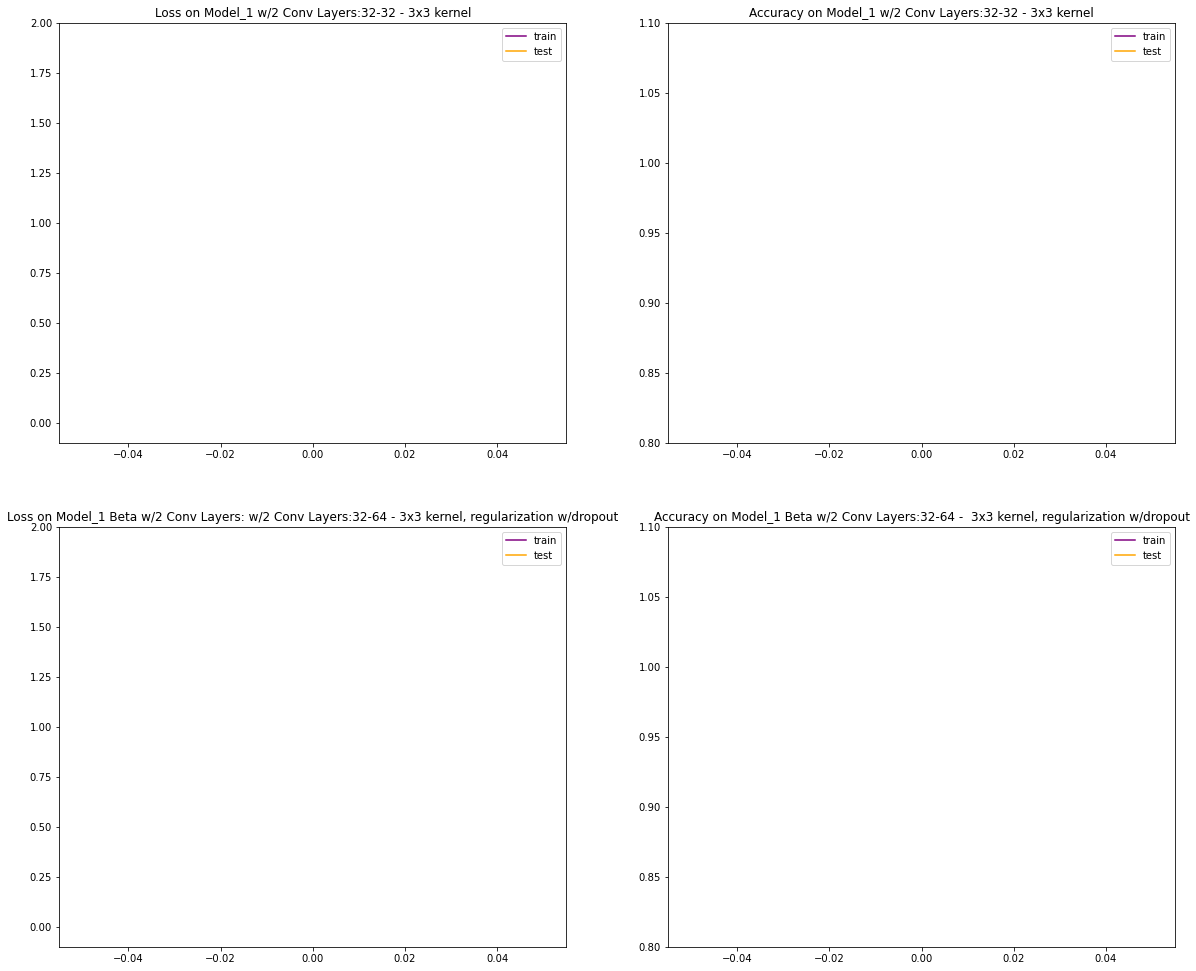

In [64]:
# Code for plotting
#visualization

fig, axs = plt.subplots(2, 2, figsize=(20,17))
#LOSS VS EPOCH PLOT MODEL 1
axs[0, 0].plot(history1.history["loss"],c = "purple")
axs[0, 0].plot(history1.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_1 w/2 Conv Layers:32-32 - 3x3 kernel')
#ACCURACY VS EPOCH PLOT MODEL 1
axs[0, 1].plot(history1.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history1.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_1 w/2 Conv Layers:32-32 - 3x3 kernel')
#LOSS VS EPOCH PLOT MODEL 1 BETA
axs[1, 0].plot(history1beta.history["loss"],c = "purple")
axs[1, 0].plot(history1beta.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_1 Beta w/2 Conv Layers: w/2 Conv Layers:32-64 - 3x3 kernel, regularization w/dropout')
#ACCURACY VS EPOCH PLOT MODEL 1 BETA
axs[1, 1].plot(history1beta.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history1beta.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_1 Beta w/2 Conv Layers:32-64 -  3x3 kernel, regularization w/dropout')

Text(0.5, 1.0, 'Accuracy on Model_2 beta w/5 conv layers: 32-64-128-256-512 filters - 7x7 kernel')

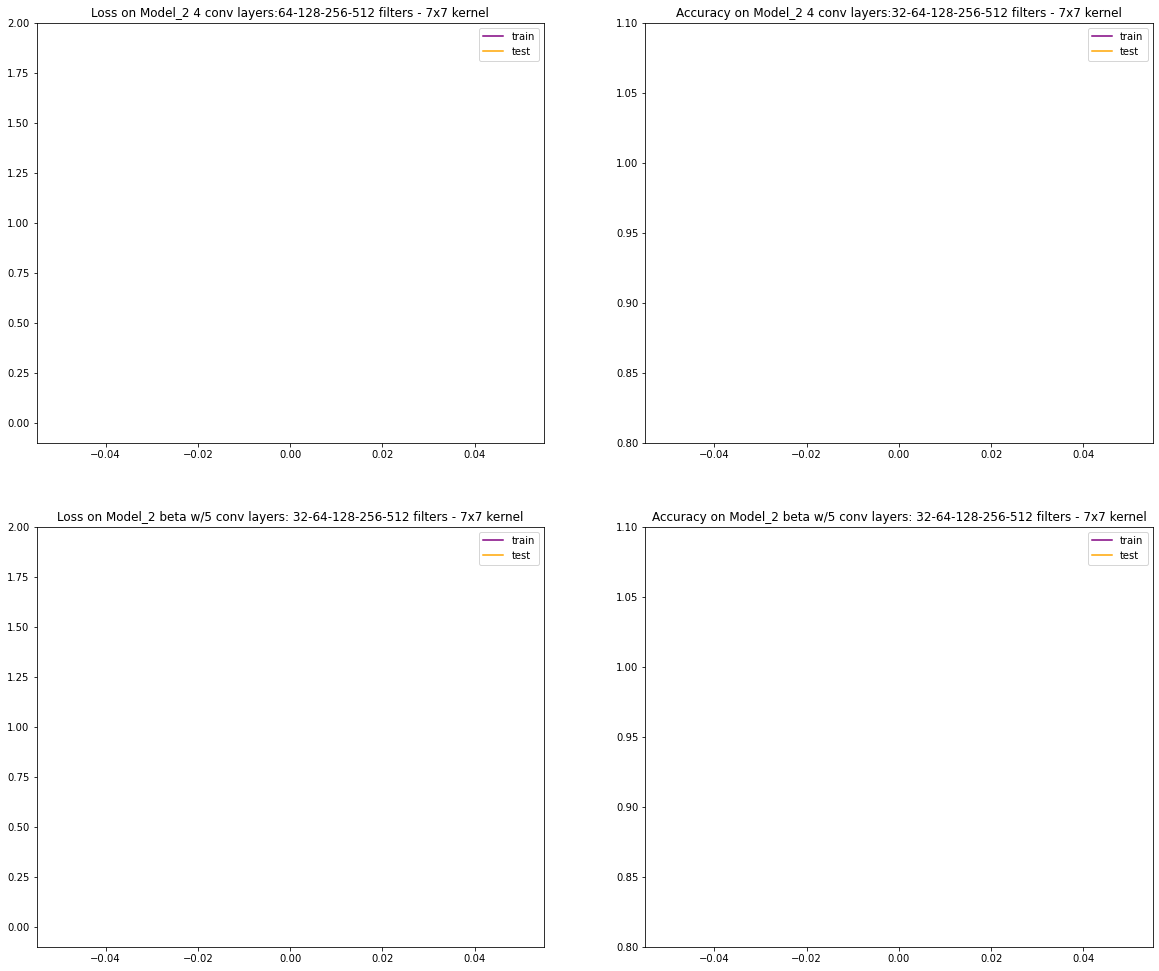

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(20,17))
#lOSS VS EPOCH MODEL 2
axs[0, 0].plot(history2.history["loss"],c = "purple")
axs[0, 0].plot(history2.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_2 4 conv layers:64-128-256-512 filters - 7x7 kernel')
#ACCURACY VS EPOCH PLOT MODEL 2
axs[0, 1].plot(history2.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history2.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_2 4 conv layers:32-64-128-256-512 filters - 7x7 kernel')
#lOSS VS EPOCH MODEL 2 BETA
axs[1, 0].plot(history2beta.history["loss"],c = "purple")
axs[1, 0].plot(history2beta.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_2 beta w/5 conv layers: 32-64-128-256-512 filters - 7x7 kernel')
#ACCURACY VS EPOCH PLOT MODEL 2 BETA
axs[1, 1].plot(history2beta.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history2beta.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_2 beta w/5 conv layers: 32-64-128-256-512 filters - 7x7 kernel')


Text(0.5, 1.0, 'Accuracy on Model_3 beta w/3 conv layers: 64-64-32 - 7x7 kernel')

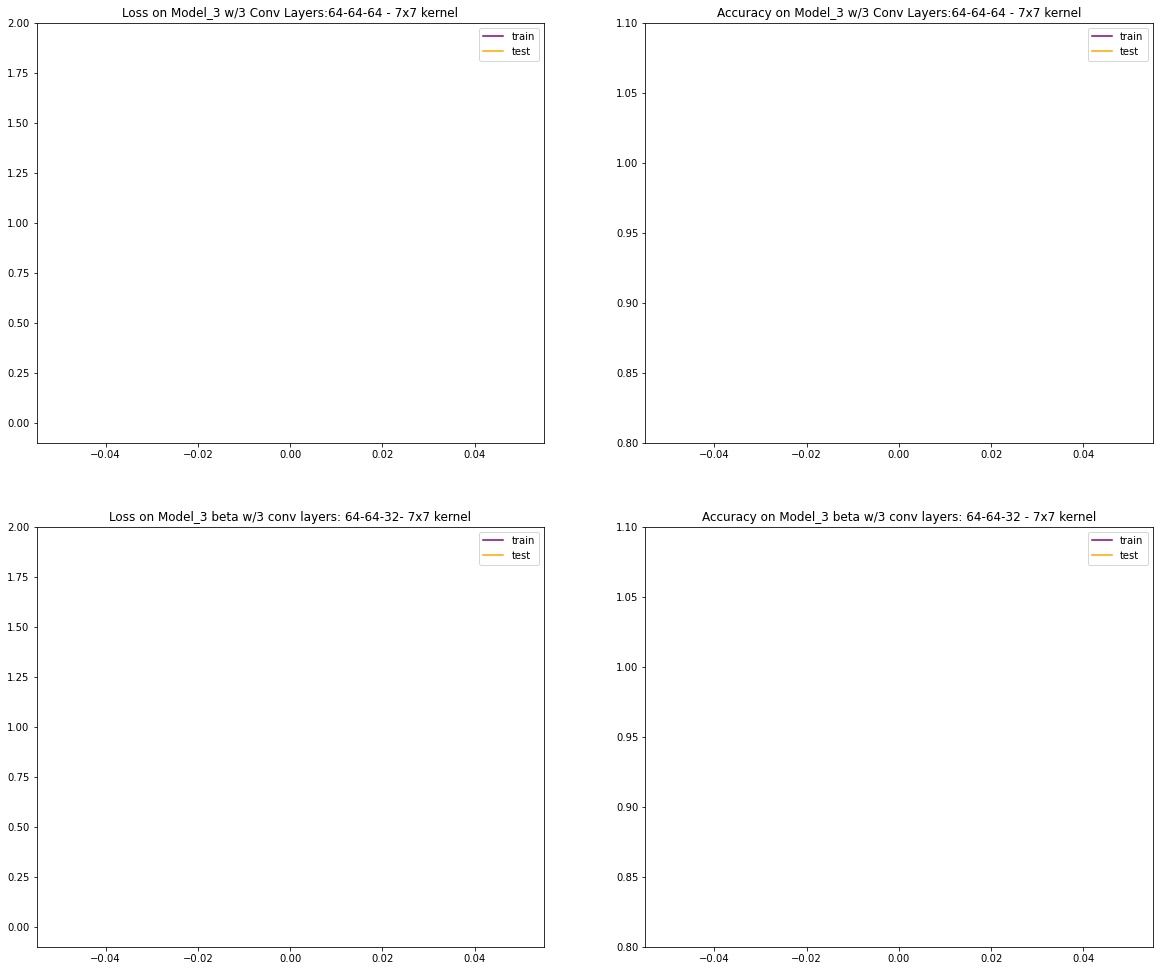

In [66]:

fig, axs = plt.subplots(2, 2, figsize=(20,17))
#lOSS VS EPOCH MODEL 3
axs[0, 0].plot(history3.history["loss"],c = "purple")
axs[0, 0].plot(history3.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_3 w/3 Conv Layers:64-64-64 - 7x7 kernel')
#ACCURACY VS EPOCH MODEL 3
axs[0, 1].plot(history3.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history3.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_3 w/3 Conv Layers:64-64-64 - 7x7 kernel')
#lOSS VS EPOCH MODEL 3 BETA
axs[1, 0].plot(history3beta.history["loss"],c = "purple")
axs[1, 0].plot(history3beta.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_3 beta w/3 conv layers: 64-64-32- 7x7 kernel')
#ACCURACY VS EPOCH MODEL 3 BETA
axs[1, 1].plot(history3beta.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history3beta.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_3 beta w/3 conv layers: 64-64-32 - 7x7 kernel')